In [1]:
#测试GPU可用性
import tensorflow as tf
print('GPU可用性:',tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU可用性: True


In [2]:
#数据读取
import numpy as np
import pandas as pd
#本次取50000条数据
chunks=50000
traindata = pd.read_csv('/mnt/workspace/Data/train_dataset/traindata.csv', nrows=chunks)    #读取训练集
trainmap = pd.read_csv('/mnt/workspace/Data/train_dataset/trainmap.csv')

In [3]:
#获取基因ID
CG_ID=traindata.iloc[:chunks,0]

In [4]:
#数据预处理函数
#预处理训练集
traindata = traindata.set_index('cpgsite')
traindata = traindata.T
traindata = traindata.reset_index()
traindata = traindata.rename(columns={'index':'sample_id'})
traindata.columns = ['sample_id'] + [i for i in range(chunks)]

In [5]:
traindata.to_pickle('/mnt/workspace/Disease_class/ClassDataPkl/ClassData.pkl')

In [6]:
#加载预处理后的数据
trainmap = pd.read_csv('/mnt/workspace/Data/train_dataset/trainmap.csv')
traindata = pd.read_pickle('/mnt/workspace/Disease_class/ClassDataPkl/ClassData.pkl')

In [7]:
#拼接CG编号
CG_ID_str=['sample_id']+list(CG_ID)
traindata.columns=CG_ID_str
traindata.head(10)

sample_id  cg00050873  cg00212031  cg00213748  cg00214611  cg00455876   
0  train10001         NaN         NaN         NaN         NaN         NaN  \
1  train10002         NaN         NaN         NaN         NaN         NaN   
2  train10003         NaN         NaN         NaN         NaN         NaN   
3  train10004         NaN         NaN         NaN         NaN         NaN   
4  train10005    1.136022   -4.489850         NaN   -3.993781    1.312567   
5  train10006    1.423834   -9.210440    1.035353   -3.837361    1.288795   
6  train10007         NaN         NaN         NaN         NaN         NaN   
7  train10008    1.475799   -3.993781         NaN   -4.051632    1.475799   
8  train10009         NaN         NaN         NaN         NaN         NaN   
9  train10010    1.515914   -4.051632         NaN   -4.585271    1.174443   

   cg01707559  cg02004872  cg02011394  cg02050847  ...  cg19321603   
0         NaN         NaN         NaN         NaN  ...    3.374769  \
1         NaN         NaN         NaN         NaN  ...    2.511081   
2         NaN         NaN         NaN         NaN  ...    2.324893   
3   -1.398461         NaN         NaN         NaN  ...    3.543689   
4   -2.901295   -4.585271    2.804368    2.985388  ...    2.401172   
5   -3.100385   -5.093549    2.767818    1.848299  ...    2.300497   
6         NaN         NaN         NaN         NaN  ...    2.648415   
7   -3.314031   -4.807960    2.785946    2.196336  ...    2.496772   
8         NaN         NaN         NaN         NaN  ...    2.218738   
9   -2.681278   -4.112908    3.406479    2.069693  ...    2.196336   

   cg19326232  cg19331040  cg19342109  cg19343088  cg19343809  cg19348622   
0   -5.492861   -3.201956   -2.414368   -2.698069   -2.942546   -4.402578  \
1   -4.247583   -3.659672   -2.218738   -2.823096   -2.804368   -3.175661   
2   -4.585271   -3.343970   -2.288480   -2.767818   -2.767818   -3.701353   
3   -4.940737   -3.314031   -2.585369   -3.007447   -4.247583   -2.861514   
4   -4.489850   -3.228904   -2.312634   -2.963760   -2.963760   -3.507691   
5   -4.247583   -3.284902   -2.131436   -3.100385   -3.149987   -3.744756   
6   -4.178048   -3.938986   -2.511081   -3.149987   -2.985388   -3.543689   
7   -5.093549   -3.314031   -2.585369   -3.007447   -2.749976   -3.837361   
8   -4.807960   -2.942546   -2.427712   -2.861514   -2.963760   -3.472874   
9   -3.659672   -3.175661   -2.100192   -2.804368   -2.749976   -3.701353   

   cg19349217  cg19349369  cg19350197  
0   -3.201956   -1.185564    2.253116  
1   -3.659672   -1.765757    2.511081  
2   -2.454856   -1.213659    1.765757  
3   -2.942546   -1.856830    2.207487  
4   -4.247583   -1.749816    2.264792  
5   -3.201956   -1.294708    2.185284  
6   -3.406479   -1.703036    2.767818  
7   -3.790034   -0.699002    2.468664  
8   -2.881228   -1.865415    2.570129  
9   -3.007447   -1.749816    2.163468  

[10 rows x 50001 columns]

In [8]:
#统计数据空缺值
traindata_null=traindata.isnull().sum().sum()    #统计前4万个特征缺失值
data_sum=traindata.shape[0]*traindata.shape[1]
traindata_null_rate=traindata_null/data_sum    #计算特征缺失率
print('训练数据缺失数据量为:{0},数据总量为:{1}'.format(traindata_null,data_sum))
print('训练数据缺失率为:{0}%'.format(round(traindata_null_rate*100,4)))

训练数据缺失数据量为:23688484,数据总量为:411658233
训练数据缺失率为:5.7544%


In [9]:
#缺失数据处理
traindata.fillna(0,inplace=True)    #训练集预处理

In [10]:
# 拼接数据集
traindata = traindata.merge(trainmap[['sample_id', 'age', 'gender', 'sample_type', 'disease']],on='sample_id',how='left')

In [11]:
#统计数据中患病数据和患病数据汇总
sample_type_sum=traindata['sample_type'].value_counts()    #统计患病数据总量
print('-----------------患病数据总量----------------')
print(sample_type_sum)
disease_sum=traindata['disease'].value_counts()    #汇总患病数据
print('-----------------患病数据汇总----------------')
print(disease_sum)

-----------------患病数据总量----------------
sample_type
control           6266
disease tissue    1967
Name: count, dtype: int64
-----------------患病数据汇总----------------
disease
control                 6266
Alzheimer's disease      737
schizophrenia            381
Parkinson's disease      266
rheumatoid arthritis     159
stroke                   147
Huntington's disease     135
Graves' disease           58
type 2 diabetes           46
Sjogren's syndrome        38
Name: count, dtype: int64


In [12]:
#数据类型转化
disease_mapping = {
    'control': 0,
    "Alzheimer's disease": 1,
    "Graves' disease": 2,
    "Huntington's disease": 3,
    "Parkinson's disease": 4,
    'rheumatoid arthritis': 5,
    'schizophrenia': 6,
    "Sjogren's syndrome": 7,
    'stroke': 8,
    'type 2 diabetes': 9
}    #构建数据对应关系
sample_type_mapping = {'control': 0, 'disease tissue': 1}
gender_mapping = {'F': 0, 'M': 1}
#训练集转化
traindata['disease_encode'] = traindata['disease'].map(disease_mapping)
traindata['sample_type_encode'] = traindata['sample_type'].map(sample_type_mapping)
traindata['gender_encode'] = traindata['gender'].map(gender_mapping)

In [13]:
traindata.head(10)

sample_id  cg00050873  cg00212031  cg00213748  cg00214611  cg00455876   
0  train10001    0.000000    0.000000    0.000000    0.000000    0.000000  \
1  train10002    0.000000    0.000000    0.000000    0.000000    0.000000   
2  train10003    0.000000    0.000000    0.000000    0.000000    0.000000   
3  train10004    0.000000    0.000000    0.000000    0.000000    0.000000   
4  train10005    1.136022   -4.489850    0.000000   -3.993781    1.312567   
5  train10006    1.423834   -9.210440    1.035353   -3.837361    1.288795   
6  train10007    0.000000    0.000000    0.000000    0.000000    0.000000   
7  train10008    1.475799   -3.993781    0.000000   -4.051632    1.475799   
8  train10009    0.000000    0.000000    0.000000    0.000000    0.000000   
9  train10010    1.515914   -4.051632    0.000000   -4.585271    1.174443   

   cg01707559  cg02004872  cg02011394  cg02050847  ...  cg19349217   
0    0.000000    0.000000    0.000000    0.000000  ...   -3.201956  \
1    0.000000    0.000000    0.000000    0.000000  ...   -3.659672   
2    0.000000    0.000000    0.000000    0.000000  ...   -2.454856   
3   -1.398461    0.000000    0.000000    0.000000  ...   -2.942546   
4   -2.901295   -4.585271    2.804368    2.985388  ...   -4.247583   
5   -3.100385   -5.093549    2.767818    1.848299  ...   -3.201956   
6    0.000000    0.000000    0.000000    0.000000  ...   -3.406479   
7   -3.314031   -4.807960    2.785946    2.196336  ...   -3.790034   
8    0.000000    0.000000    0.000000    0.000000  ...   -2.881228   
9   -2.681278   -4.112908    3.406479    2.069693  ...   -3.007447   

   cg19349369  cg19350197   age  gender     sample_type              disease   
0   -1.185564    2.253116  88.0       F  disease tissue  Alzheimer's disease  \
1   -1.765757    2.511081  92.0       F  disease tissue  Alzheimer's disease   
2   -1.213659    1.765757  93.0       F  disease tissue  Alzheimer's disease   
3   -1.856830    2.207487  96.0       F  disease tissue  Alzheimer's disease   
4   -1.749816    2.264792  91.0       M  disease tissue  Alzheimer's disease   
5   -1.294708    2.185284  80.0       M  disease tissue  Alzheimer's disease   
6   -1.703036    2.767818  79.0       F  disease tissue  Alzheimer's disease   
7   -0.699002    2.468664  77.0       M  disease tissue  Alzheimer's disease   
8   -1.865415    2.570129  85.0       F  disease tissue  Alzheimer's disease   
9   -1.749816    2.163468  80.0       M  disease tissue  Alzheimer's disease   

   disease_encode  sample_type_encode  gender_encode  
0               1                   1            0.0  
1               1                   1            0.0  
2               1                   1            0.0  
3               1                   1            0.0  
4               1                   1            1.0  
5               1                   1            1.0  
6               1                   1            0.0  
7               1                   1            1.0  
8               1                   1            0.0  
9               1                   1            1.0  

[10 rows x 50008 columns]

In [14]:
traindata['sample_type_encode'].value_counts()

sample_type_encode
0    6266
1    1967
Name: count, dtype: int64

In [59]:
#数据集划分
DataClass=traindata.loc[traindata['sample_type_encode']==1,:]    #去除正常数据
DataClass_Nomal=DataClass.iloc[:,1:-7]    #输入特征
Disease=DataClass.loc[:,'disease_encode']    #输入标签

In [60]:
DataClass_Nomal

cg00050873  cg00212031  cg00213748  cg00214611  cg00455876  cg01707559   
0       0.000000    0.000000         0.0    0.000000    0.000000    0.000000  \
1       0.000000    0.000000         0.0    0.000000    0.000000    0.000000   
2       0.000000    0.000000         0.0    0.000000    0.000000    0.000000   
3       0.000000    0.000000         0.0    0.000000    0.000000   -1.398461   
4       1.136022   -4.489850         0.0   -3.993781    1.312567   -2.901295   
...          ...         ...         ...         ...         ...         ...   
8228    1.991711   -3.886935         0.0   -3.256540    0.851873   -2.664729   
8229    2.020410   -3.938986         0.0   -3.543689    1.259524   -2.388119   
8230    1.814692   -3.343970         0.0   -3.580953    0.000000   -2.570129   
8231    1.550147   -2.963760         0.0   -3.744756    1.443126   -0.904911   
8232    2.142023   -2.881228         0.0   -3.701353    0.000000   -2.110522   

      cg02004872  cg02011394  cg02050847  cg02233190  ...  cg19321603   
0       0.000000    0.000000    0.000000    0.000000  ...    3.374769  \
1       0.000000    0.000000    0.000000    0.000000  ...    2.511081   
2       0.000000    0.000000    0.000000    0.000000  ...    2.324893   
3       0.000000    0.000000    0.000000    0.000000  ...    3.543689   
4      -4.585271    2.804368    2.985388   -4.402578  ...    2.401172   
...          ...         ...         ...         ...  ...         ...   
8228   -4.051632    2.842141    4.585271   -4.322159  ...    2.142023   
8229   -4.112908    3.472874    3.701353   -3.938986  ...    1.963624   
8230   -4.585271    3.343970    4.585271   -4.178048  ...    1.865415   
8231   -4.585271    3.374769    3.837361   -3.993781  ...    1.900305   
8232   -4.051632    3.406479    4.807960   -4.247583  ...    2.300497   

      cg19326232  cg19331040  cg19342109  cg19343088  cg19343809  cg19348622   
0      -5.492861   -3.201956   -2.414368   -2.698069   -2.942546   -4.402578  \
1      -4.247583   -3.659672   -2.218738   -2.823096   -2.804368   -3.175661   
2      -4.585271   -3.343970   -2.288480   -2.767818   -2.767818   -3.701353   
3      -4.940737   -3.314031   -2.585369   -3.007447   -4.247583   -2.861514   
4      -4.489850   -3.228904   -2.312634   -2.963760   -2.963760   -3.507691   
...          ...         ...         ...         ...         ...         ...   
8228   -4.585271   -4.051632   -2.540233   -2.482634   -3.149987   -3.790034   
8229   -4.247583   -3.374769   -2.276579   -2.401172   -2.632328   -3.580953   
8230   -4.690541   -3.472874   -2.664729   -2.861514   -3.029956   -3.406479   
8231   -4.940737   -3.228904   -2.454856   -3.076403   -3.543689   -3.619579   
8232   -4.489850   -3.886935   -2.540233   -2.901295   -2.921730   -3.343970   

      cg19349217  cg19349369  cg19350197  
0      -3.201956   -1.185564    2.253116  
1      -3.659672   -1.765757    2.511081  
2      -2.454856   -1.213659    1.765757  
3      -2.942546   -1.856830    2.207487  
4      -4.247583   -1.749816    2.264792  
...          ...         ...         ...  
8228   -2.732410   -4.402578    0.929415  
8229   -2.664729   -3.507691    0.708031  
8230   -4.247583   -3.993781    0.627708  
8231   -3.543689   -4.247583    0.818704  
8232   -3.886935   -4.178048    0.880658  

[1967 rows x 50000 columns]

特征选择

In [61]:
#低方差滤过策略
from sklearn.feature_selection import VarianceThreshold
Variance_Threshold=VarianceThreshold(threshold=0.5)
Variance_Threshold.fit(DataClass_Nomal)
print('剩余特征个数:',len(Variance_Threshold.get_support(True)))

剩余特征个数: 21526


In [62]:
from pandas import DataFrame
DataClass_Nomal=Variance_Threshold.transform(DataClass_Nomal)    #数据集转化
DataClass_Nomal=DataFrame(DataClass_Nomal)
DataClass_Nomal.columns=Variance_Threshold.get_feature_names_out()

In [63]:
#高相关过滤法，基于F分布
from sklearn.feature_selection import SelectKBest,f_classif
KBest=SelectKBest(score_func=f_classif,k=10000)    #获取高相关的前100000个特征
KBest.fit(DataClass_Nomal,Disease)
from pandas import DataFrame
Score_DF=DataFrame()
Score_DF['feature']=DataFrame(DataClass_Nomal).columns    #特征命
Score_DF['Score']=KBest.scores_    #相关系数
Score_DF['P-value']=KBest.pvalues_    #P值
Score_DF=Score_DF.sort_values('Score',ascending=False)

In [64]:
#查看特征相关系数、P值
Score_DF.head(50)

feature       Score  P-value
11561  cg26627956  633.461721      0.0
20497  cg11984911  598.177276      0.0
11080  cg22924060  567.136385      0.0
5138   cg12611488  554.818680      0.0
18859  cg00237391  544.959104      0.0
17648  cg14802502  538.319240      0.0
3215   cg02711163  534.166334      0.0
6802   cg21167532  532.836022      0.0
15398  cg17266278  529.956758      0.0
4590   cg09859080  519.752426      0.0
5335   cg13487474  511.234181      0.0
8243   cg01850889  511.141642      0.0
13921  cg27351619  509.093742      0.0
13556  cg23060646  508.704868      0.0
13571  cg23198707  508.076760      0.0
10090  cg15579587  505.937566      0.0
16011  cg24686357  502.328186      0.0
7829   cg26660656  499.836756      0.0
10424  cg18106923  497.055729      0.0
10120  cg15780398  491.149224      0.0
10216  cg16596103  491.022172      0.0
19307  cg03355690  489.529735      0.0
12821  cg13872831  489.241553      0.0
5324   cg13466383  488.425997      0.0
7020   cg22495848  488.058529      0.0
3848   cg06033579  487.724934      0.0
11173  cg23429966  486.836169      0.0
8515   cg03954048  484.712512      0.0
8111   cg00746446  483.499591      0.0
16639  cg04196933  482.078617      0.0
13840  cg26292910  481.877692      0.0
5594   cg15096829  481.790437      0.0
19891  cg07858113  481.291080      0.0
3636   cg04786142  479.425709      0.0
4738   cg10626816  477.699773      0.0
21326  cg17983632  476.994126      0.0
12341  cg07808036  476.436161      0.0
16565  cg03540794  476.346195      0.0
6687   cg20462242  474.312964      0.0
15622  cg19923393  472.868532      0.0
11937  cg02945385  471.893457      0.0
3510   cg04132522  470.773913      0.0
19457  cg04537567  469.661005      0.0
13388  cg20693607  469.559570      0.0
10184  cg16326123  469.099228      0.0
6546   cg19803229  469.067731      0.0
7289   cg23924306  468.470659      0.0
5472   cg14258143  468.363065      0.0
10311  cg17245125  466.474589      0.0
19591  cg05583848  464.999775      0.0

In [65]:
#数据拼接
DataClass_Nomal=KBest.transform(DataClass_Nomal)
DataClass_Nomal=DataFrame(DataClass_Nomal)
DataClass_Nomal.columns=KBest.get_feature_names_out()

In [66]:
#数据样本正态性检验
from scipy.stats import normaltest
CgNormal_list=[]
for cg in DataClass_Nomal.columns:
    cg_data=DataClass_Nomal.loc[:,cg]    #获取cg数据
    NormalStats,p_value=normaltest(cg_data)     #正态检验
    if p_value>=0.05:
        print('甲基化位点:{0},正态检验结果:{1},P值:{2}'.format(cg,NormalStats,p_value))
        CgNormal_list.append(cg)

甲基化位点:cg00016934,正态检验结果:2.9842344322420744,P值:0.22489599769178495
甲基化位点:cg01710449,正态检验结果:5.953023589022082,P值:0.0509703190792716
甲基化位点:cg19045293,正态检验结果:1.2081956375207628,P值:0.5465673070431549
甲基化位点:cg00647217,正态检验结果:3.3922917550848917,P值:0.18338896728447615
甲基化位点:cg00860370,正态检验结果:0.9801486934811473,P值:0.6125808491019044
甲基化位点:cg02284587,正态检验结果:3.8139272364299246,P值:0.14853069849749562
甲基化位点:cg04400972,正态检验结果:0.8226563162131387,P值:0.6627694027584516
甲基化位点:cg05590948,正态检验结果:0.2756393474748166,P值:0.8712557878810832
甲基化位点:cg06035600,正态检验结果:2.293783321067579,P值:0.31762251516836676
甲基化位点:cg07921092,正态检验结果:3.672990778949823,P值:0.15937499579162906
甲基化位点:cg07970040,正态检验结果:4.921651466988524,P值:0.08536443358501589
甲基化位点:cg08847173,正态检验结果:5.253104413149044,P值:0.07232740278818417
甲基化位点:cg09032544,正态检验结果:1.074977886396756,P值:0.5842134051077503
甲基化位点:cg09327714,正态检验结果:2.5883587014263245,P值:0.27412273067405746
甲基化位点:cg10400707,正态检验结果:5.933782048837754,P值:0.051463059270071596
甲基化位点:cg12222949,正态检验结

类别标签分布
disease_encode
1    737
6    381
4    266
5    159
8    147
3    135
2     58
9     46
7     38
Name: count, dtype: int64


/tmp/ipykernel_437/1233856966.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Disease,hist=True,kde=False)


<Axes: xlabel='disease_encode'>

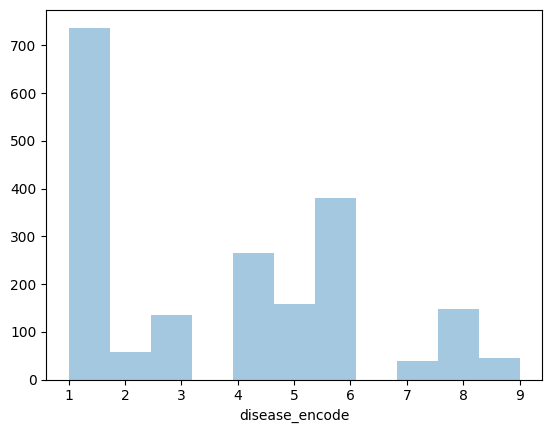

In [67]:
#查看标签数据分布
print('类别标签分布')
print(Disease.value_counts())
import seaborn as sns
sns.distplot(Disease,hist=True,kde=False)

不包含正常样本

In [68]:
#分配训练和测试集
from sklearn.model_selection import train_test_split
DataClass_Nomal['Gender']=traindata.loc[:,'gender_encode']    #接入性别数据
DataClass_Nomal['Gender'].fillna(0,inplace=True)
Disease=Disease-1    #标签调整
Data_train_class,Data_test_class,Label_train_class,Label_test_class=train_test_split(DataClass_Nomal,Disease,train_size=0.8,random_state=123)
print('训练集数据规模为:{0},测试集数据规模为:{1}'.format(Data_train_class.shape,Data_test_class.shape))
print('训练集标签规模为:{0},测试集标签规模为:{1}'.format(Label_train_class.shape,Label_test_class.shape)) 

训练集数据规模为:(1573, 10001),测试集数据规模为:(394, 10001)
训练集标签规模为:(1573,),测试集标签规模为:(394,)


In [69]:
#查看数据标签分布
print('-------------训练数据集------------------')
print(Label_train_class.value_counts())
print('-------------测试数据集------------------')
print(Label_test_class.value_counts())

-------------训练数据集------------------
disease_encode
0    589
5    305
3    210
4    128
7    121
2    103
1     50
8     39
6     28
Name: count, dtype: int64
-------------测试数据集------------------
disease_encode
0    148
5     76
3     56
2     32
4     31
7     26
6     10
1      8
8      7
Name: count, dtype: int64


In [70]:
#查看数据分布
from collections import Counter
print('原始数据分布:',Counter(Label_train_class))

原始数据分布: Counter({0: 589, 5: 305, 3: 210, 4: 128, 7: 121, 2: 103, 1: 50, 8: 39, 6: 28})


使用自适应过采样（ADASYN）优化数据集类别分布

/home/pai/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/home/pai/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/home/pai/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/home/pai/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass

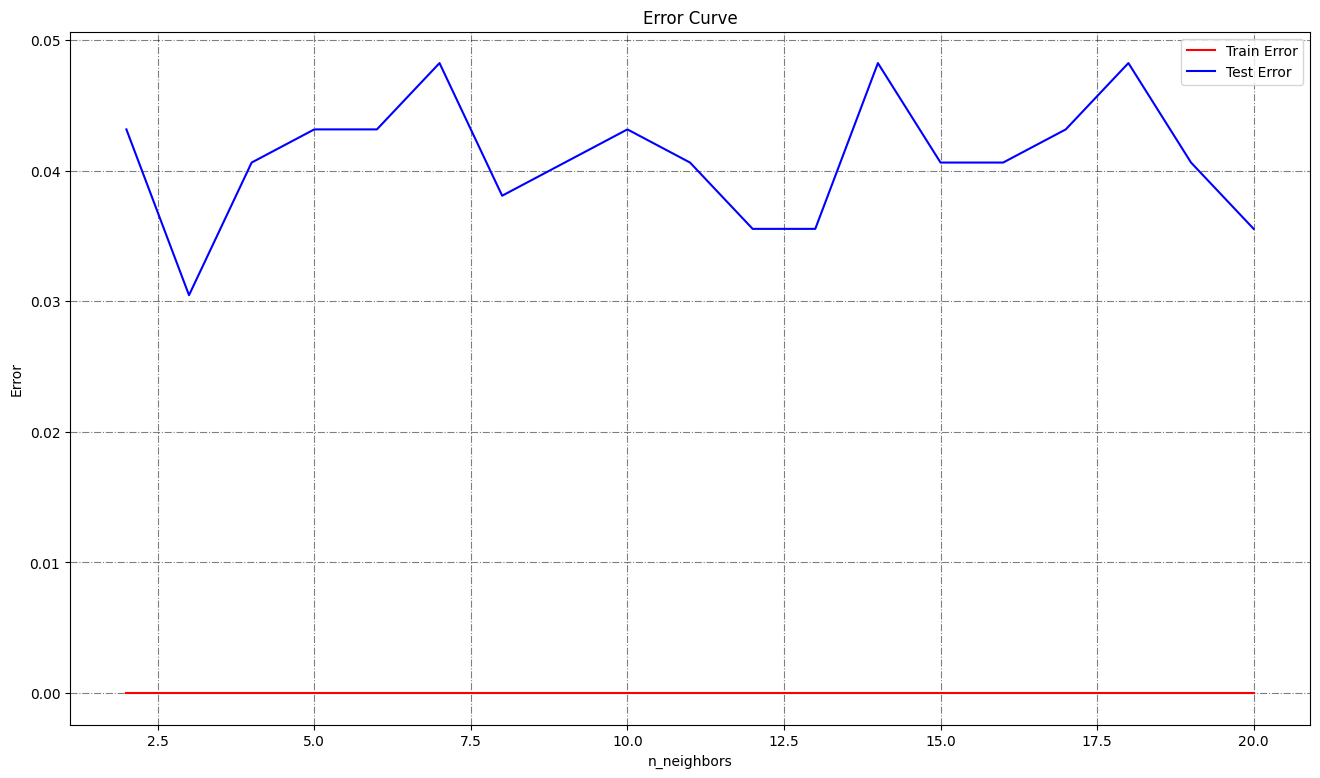

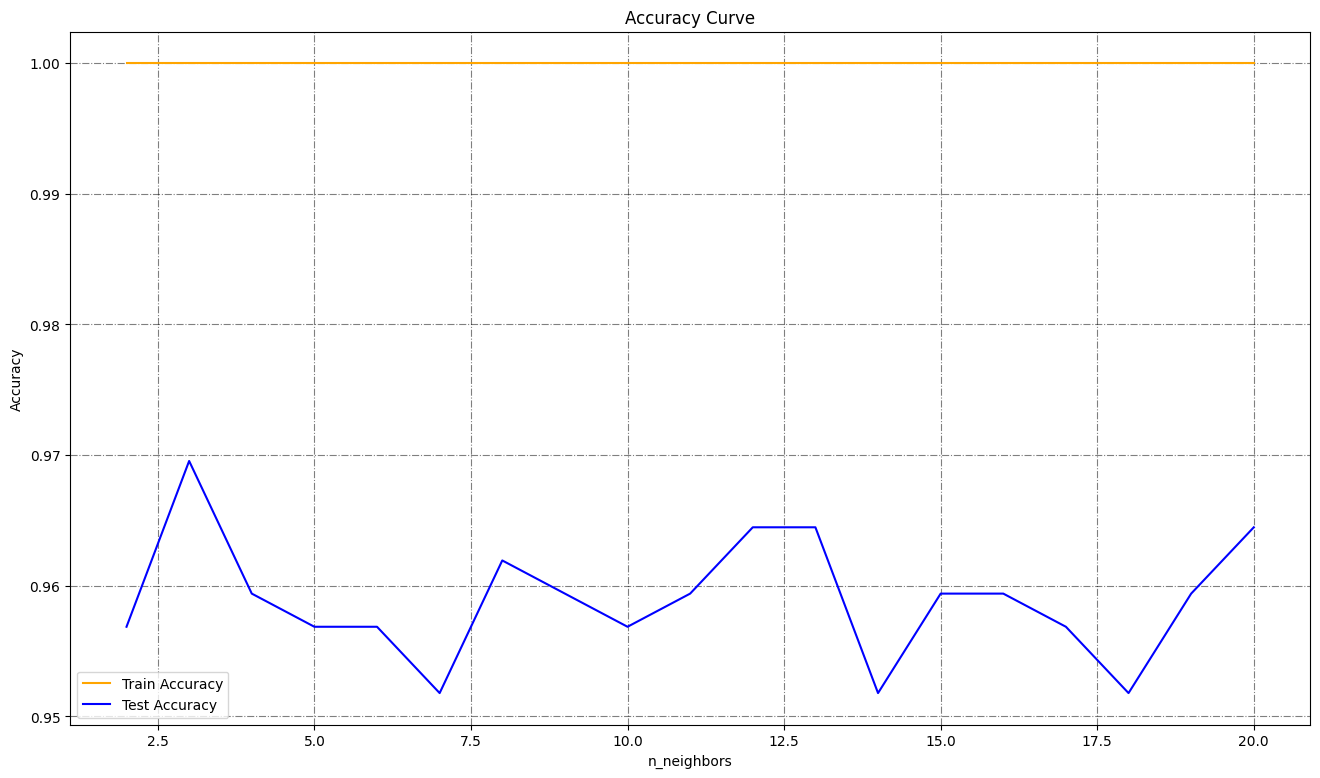

In [116]:
#使用自适应过采样优化类别标签
from imblearn.over_sampling import ADASYN,SMOTE
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
Train_error,Test_error,Train_accuracy,Test_accuracy=[],[],[],[]
for k in np.arange(2,21):
    Adasyn=ADASYN(random_state=2024,n_jobs=-1,sampling_strategy='auto',n_neighbors=k)
    X_resampled,y_resampled=Adasyn.fit_resample(Data_train_class,Label_train_class)
    ModelXGB_ADASYN=XGBClassifier(booster='gbtree',n_estimators=1000,max_depth=2,objective='multi-softmax',
                                      gpu_id=0, tree_method='gpu_hist')
    ModelXGB_ADASYN.fit(X_resampled,y_resampled)    #模型训练
    Train_error.append(1-ModelXGB_ADASYN.score(X_resampled,y_resampled))    #训练误差
    Test_error.append(1-ModelXGB_ADASYN.score(Data_test_class,Label_test_class))    #测试误差
    Train_accuracy.append(accuracy_score(y_resampled,ModelXGB_ADASYN.predict(X_resampled)))    #训练精度
    Test_accuracy.append(accuracy_score(Label_test_class,ModelXGB_ADASYN.predict(Data_test_class)))    #测试精度
Error_fig=plt.figure(figsize=(16,9))
Error_ax=Error_fig.add_subplot(111)
Error_ax.set_title('Error Curve')
Error_ax.grid(color='black',linestyle='-.',alpha=0.5)
Error_ax.plot(np.arange(2,21),Train_error,linestyle='-',color='red',label='Train Error')
Error_ax.plot(np.arange(2,21),Test_error,linestyle='-',color='blue',label='Test Error')
Error_ax.set_xlabel('n_neighbors')
Error_ax.set_ylabel('Error')
plt.legend()
plt.show()
Accuracy_fig=plt.figure(figsize=(16,9))
Accuracy_ax=Accuracy_fig.add_subplot(111)
Accuracy_ax.set_title('Accuracy Curve')
Accuracy_ax.grid(color='black',linestyle='-.',alpha=0.5)
Accuracy_ax.plot(np.arange(2,21),Train_accuracy,linestyle='-',color='orange',label='Train Accuracy')
Accuracy_ax.plot(np.arange(2,21),Test_accuracy,linestyle='-',color='blue',label='Test Accuracy')
Accuracy_ax.set_xlabel('n_neighbors')
Accuracy_ax.set_ylabel('Accuracy')
plt.legend()
plt.show()

/home/pai/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


自适应过采样后数据分布: Counter({5: 745, 4: 738, 7: 738, 0: 737, 1: 737, 6: 737, 8: 737, 3: 734, 2: 726})


/tmp/ipykernel_437/2468636350.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Disease_Resampled,hist=True,kde=False,rug=False)


<Axes: xlabel='disease_encode'>

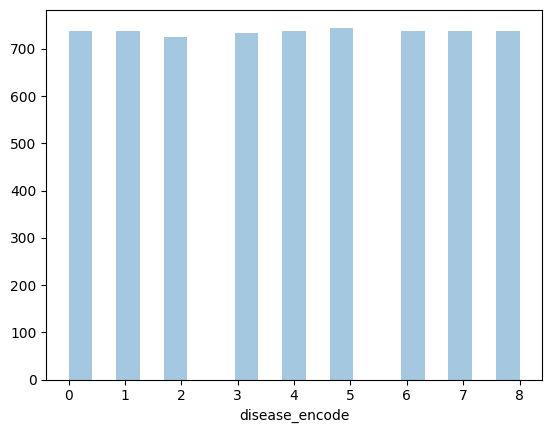

In [117]:
#采用ADASYN算法优化数据集
from imblearn.over_sampling import ADASYN
Adasyn=ADASYN(random_state=2024,n_jobs=-1,sampling_strategy='auto',n_neighbors=3)
DataClass_Nomal_Resmapled,Disease_Resampled=Adasyn.fit_resample(DataClass_Nomal,Disease)
print('自适应过采样后数据分布:',Counter(Disease_Resampled))
sns.distplot(Disease_Resampled,hist=True,kde=False,rug=False)

训练XGBoost模型

In [118]:
Data_train_class_resample,Data_test_class_resample,Label_train_class_resample,Label_test_class_resample=train_test_split(
    DataClass_Nomal_Resmapled,Disease_Resampled,train_size=0.8,random_state=123)
print('训练集数据规模为:{0},测试集数据规模为:{1}'.format(Data_train_class_resample.shape,Data_test_class_resample.shape))
print('训练集标签规模为:{0},测试集标签规模为:{1}'.format(Label_train_class_resample.shape,Label_test_class_resample.shape)) 

训练集数据规模为:(5303, 10001),测试集数据规模为:(1326, 10001)
训练集标签规模为:(5303,),测试集标签规模为:(1326,)


In [119]:
#加载并训练XGBoost模型
import xgboost
Model_XGB_Class=xgboost.XGBClassifier(booster='gbtree',n_estimators=1000,max_depth=2,objective='multi-softmax',gpu_id=0, tree_method='gpu_hist')
Model_XGB_Class.fit(Data_train_class,Label_train_class) 

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [120]:
#模型测量
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report
def Model_Evaluate(model,X_train,y_train,X_test,y_test):
    train_error=1-model.score(X_train,y_train)    #训练误差
    test_error=1-model.score(X_test,y_test)    #测试误差
    print('模型训练误差为:{0},测试误差为:{1}'.format(train_error,test_error))
    train_pred=model.predict(X_train)    #训练误差测定
    precision_train=precision_score(y_train,train_pred,average='micro')
    recall_train=recall_score(y_train,train_pred,average='micro')
    f1_train=f1_score(y_train,train_pred,average='micro')
    accuracy_train=accuracy_score(y_train,train_pred)
    print('模型训练准确率为:{0},召回率为:{1},f1分数为:{2},精度为:{3}'.format(precision_train,recall_train,f1_train,accuracy_train))
    test_pred=model.predict(X_test)    #测试误差测定
    precision_test=precision_score(y_test,test_pred,average='micro')
    recall_test=recall_score(y_test,test_pred,average='micro')
    f1_test=f1_score(y_test,test_pred,average='micro')
    accuracy_test=accuracy_score(y_test,test_pred)
    print('模型测试准确率为:{0},召回率为:{1},f1分数为:{2},精度为:{3}'.format(precision_test,recall_test,f1_test,accuracy_test))
    train_err=1-model.score(X_train,y_train)
    test_err=1-model.score(X_test,y_test)
    print('模型训练误差:{0},测试误差:{1}'.format(train_err,test_err))
    print('---------------------训练数据集报告---------------------')
    print(classification_report(y_train,train_pred))
    print('---------------------测试数据集报告---------------------')
    print(classification_report(y_test,test_pred))
Model_Evaluate(Model_XGB_Class, Data_train_class,Label_train_class, Data_test_class,Label_test_class)

模型训练误差为:0.0,测试误差为:0.03807106598984766
模型训练准确率为:1.0,召回率为:1.0,f1分数为:1.0,精度为:1.0
模型测试准确率为:0.9619289340101523,召回率为:0.9619289340101523,f1分数为:0.9619289340101523,精度为:0.9619289340101523
模型训练误差:0.0,测试误差:0.03807106598984766
---------------------训练数据集报告---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       589
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00       103
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       128
           5       1.00      1.00      1.00       305
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00       121
           8       1.00      1.00      1.00        39

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

---------------------测试数据集报告---

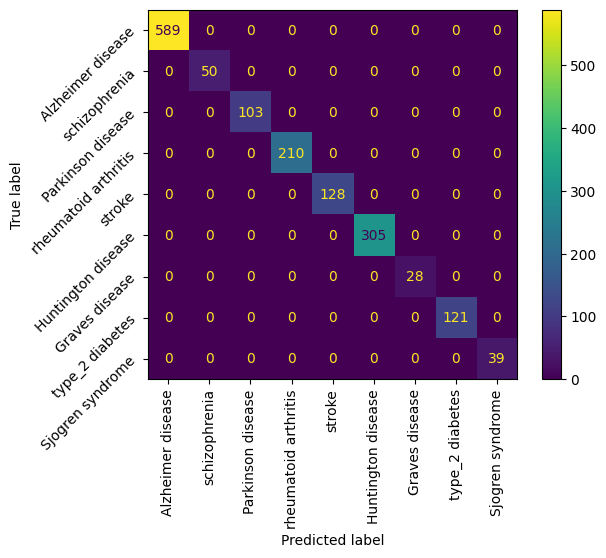

In [121]:
#可视化混淆矩阵
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
Label_class=['Alzheimer disease','schizophrenia','Parkinson disease','rheumatoid arthritis',
             'stroke','Huntington disease','Graves disease','type_2 diabetes','Sjogren syndrome']
def Viz_confusion_Matrix(model,X,y):
    y_pred=model.predict(X)
    con_matr=confusion_matrix(y, y_pred)
    con_matr=ConfusionMatrixDisplay(con_matr,display_labels=Label_class)
    con_matr.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal', values_format='d', ax=None)
    con_matr.ax_.set_xticklabels(Label_class, rotation=90)  # 这里可以设置x轴标签的旋转角度 
    con_matr.ax_.set_yticklabels(Label_class, rotation=45)  # 这里可以设置y轴标签的旋转角度
Viz_confusion_Matrix(Model_XGB_Class, Data_train_class,Label_train_class)    #可视化Xgboost模型混淆矩阵(训练)

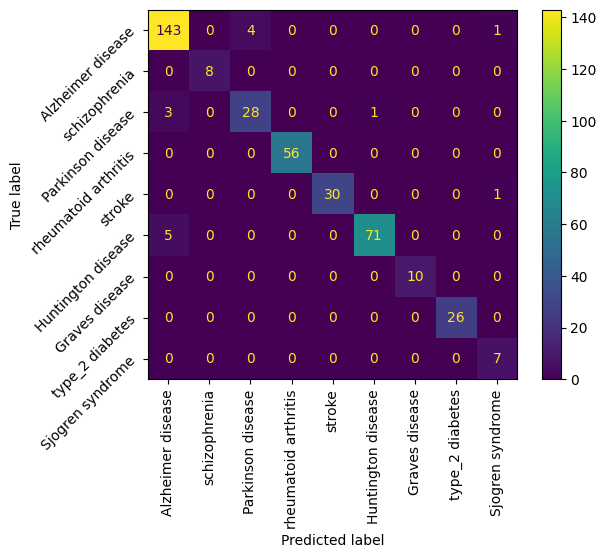

In [122]:
Viz_confusion_Matrix(Model_XGB_Class, Data_test_class,Label_test_class)    #可视化Xgboost模型混淆矩阵(测试)

<Axes: title={'center': 'Feature importance'}, xlabel='gain', ylabel='Features'>

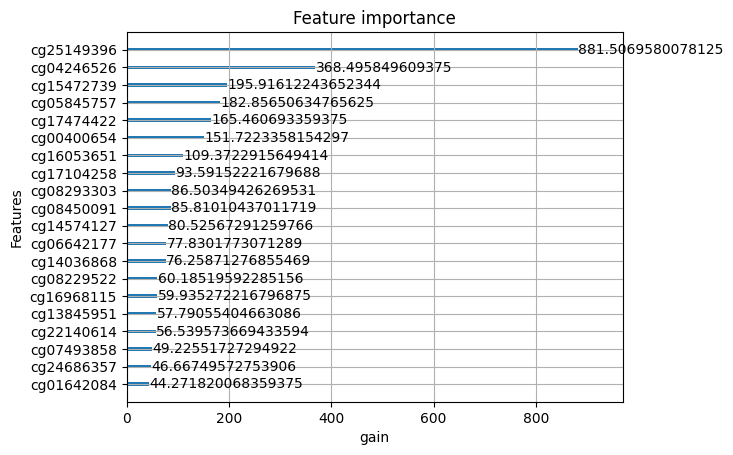

In [123]:
#提取贡献较大的前20个甲基化位点
from xgboost import plot_importance
plot_importance(Model_XGB_Class,max_num_features=20,importance_type='gain',xlabel='gain')    #可视化前20个甲基化位点数据

In [124]:
#训练自适应采样后数据模型
Model_XGB_ADASYN=XGBClassifier(booster='gbtree',n_estimators=1000,max_depth=2,objective='multi-softmax',gpu_id=0, tree_method='gpu_hist')
Model_XGB_ADASYN.fit(Data_train_class_resample,Label_train_class_resample)
Model_Evaluate(Model_XGB_ADASYN,Data_train_class_resample,Label_train_class_resample ,
               Data_test_class_resample,Label_test_class_resample)

模型训练误差为:0.0,测试误差为:0.002262443438914019
模型训练准确率为:1.0,召回率为:1.0,f1分数为:1.0,精度为:1.0
模型测试准确率为:0.997737556561086,召回率为:0.997737556561086,f1分数为:0.997737556561086,精度为:0.997737556561086
模型训练误差:0.0,测试误差:0.002262443438914019
---------------------训练数据集报告---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       587
           1       1.00      1.00      1.00       583
           2       1.00      1.00      1.00       571
           3       1.00      1.00      1.00       583
           4       1.00      1.00      1.00       605
           5       1.00      1.00      1.00       593
           6       1.00      1.00      1.00       595
           7       1.00      1.00      1.00       607
           8       1.00      1.00      1.00       579

    accuracy                           1.00      5303
   macro avg       1.00      1.00      1.00      5303
weighted avg       1.00      1.00      1.00      5303

---------------------测试数据集报告-----

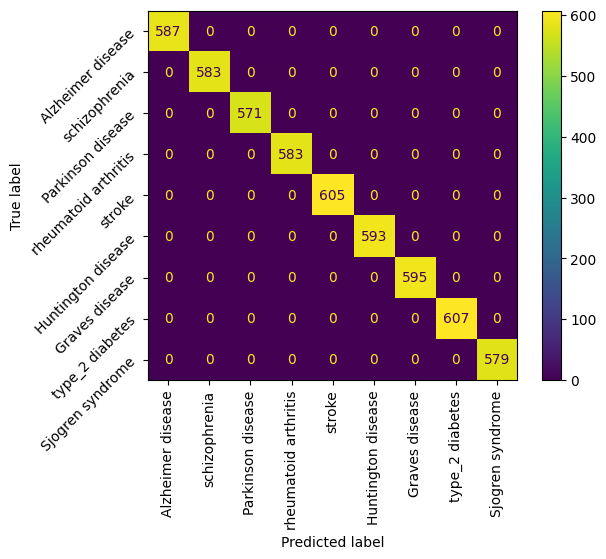

In [125]:
Viz_confusion_Matrix(Model_XGB_ADASYN, Data_train_class_resample,Label_train_class_resample)    #可视化Xgboost模型混淆矩阵(训练)

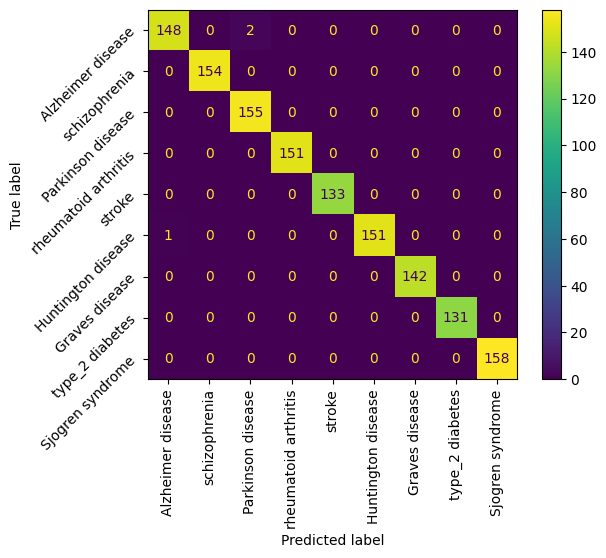

In [126]:
Viz_confusion_Matrix(Model_XGB_ADASYN, Data_test_class_resample,Label_test_class_resample)    #可视化Xgboost模型混淆矩阵(训练)

<Axes: title={'center': 'Feature importance'}, xlabel='gain', ylabel='Features'>

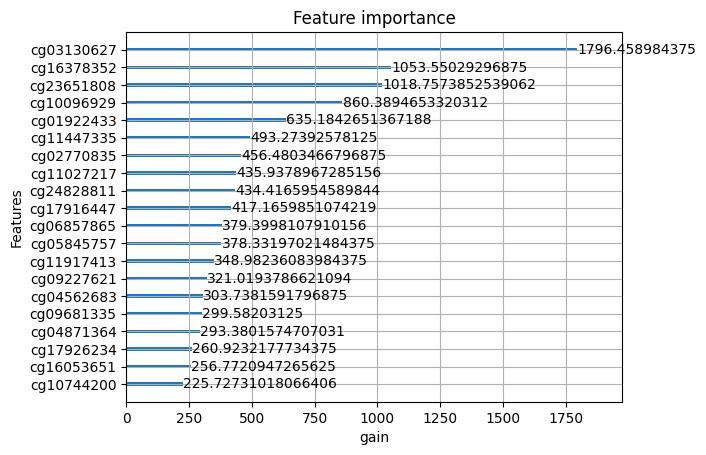

In [129]:
plot_importance(Model_XGB_ADASYN,max_num_features=20,importance_type='gain',xlabel='gain')

In [130]:
#保存模型
import joblib
joblib.dump(Model_XGB_Class,'/mnt/workspace/Disease_class/ClassModels_Nomal/Model_XGB_Class.pkl')
Model_XGB_Class.save_model('/mnt/workspace/Disease_class/ClassModels_Nomal/model_file_xgb_class.xgb')
joblib.dump(Model_XGB_ADASYN,'/mnt/workspace/Disease_class/ClassModels_Nomal/Model_XGB_ADASYN.pkl')
Model_XGB_ADASYN.save_model('/mnt/workspace/Disease_class/ClassModels_Nomal/model_file_xgb_ADASYN.xgb')

训练LightGBM模型

In [ ]:
from lightgbm import LGBMClassifier
Model_LGB_Class=LGBMClassifier(subsample=0.5,colsample_bytree=0.5,n_jobs=-1)
Model_LGB_Class.fit(Data_train_class,Label_train_class)

In [132]:
Model_Evaluate(Model_LGB_Class, Data_train_class,Label_train_class, Data_test_class,Label_test_class)

模型训练误差为:0.0,测试误差为:0.045685279187817285
模型训练准确率为:1.0,召回率为:1.0,f1分数为:1.0,精度为:1.0
模型测试准确率为:0.9543147208121827,召回率为:0.9543147208121827,f1分数为:0.9543147208121827,精度为:0.9543147208121827
模型训练误差:0.0,测试误差:0.045685279187817285
---------------------训练数据集报告---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       589
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00       103
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       128
           5       1.00      1.00      1.00       305
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00       121
           8       1.00      1.00      1.00        39

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

---------------------测试数据集报告-

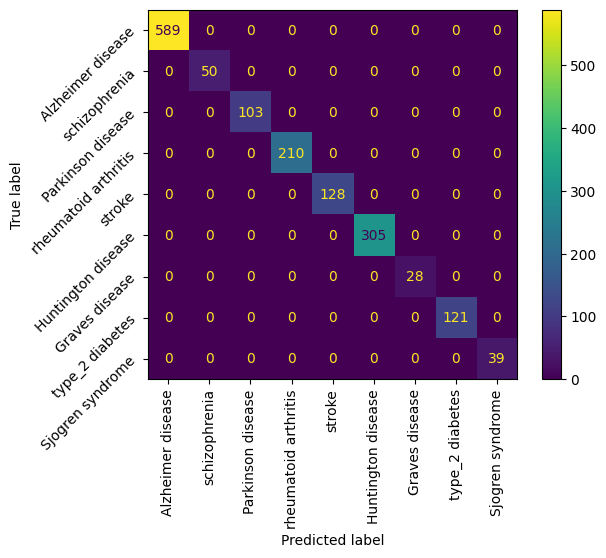

In [133]:
Viz_confusion_Matrix(Model_LGB_Class, Data_train_class,Label_train_class)    #可视化lightGM模型混淆矩阵(训练)

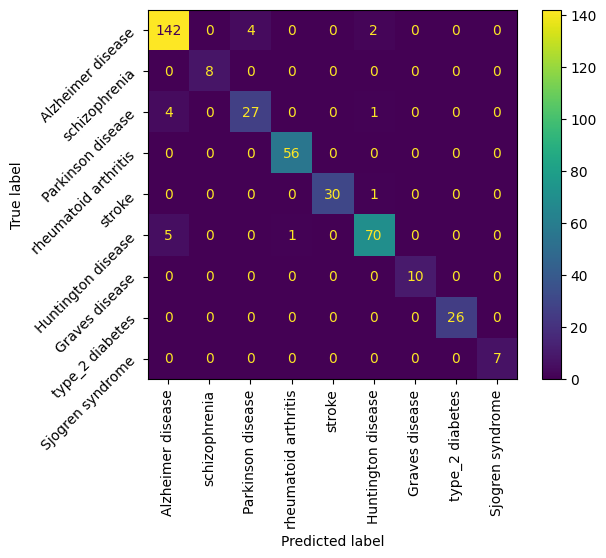

In [134]:
Viz_confusion_Matrix(Model_LGB_Class, Data_test_class,Label_test_class)    #可视化lightGM模型混淆矩阵(测试)

<Axes: title={'center': 'Feature importance'}, xlabel='gain', ylabel='Features'>

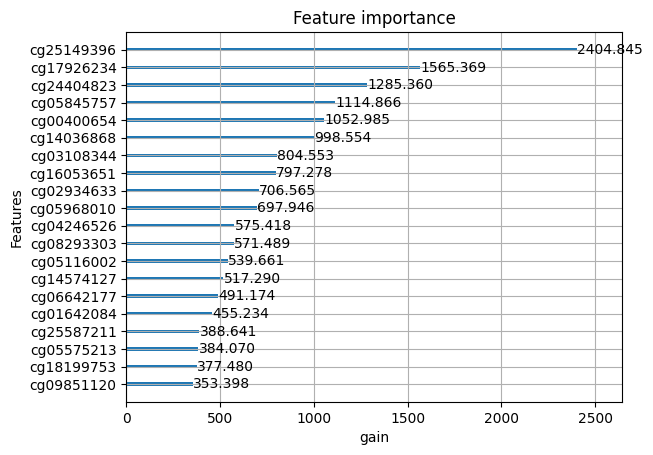

In [135]:
from lightgbm import plot_importance
plot_importance(Model_LGB_Class,max_num_features=20,importance_type='gain',xlabel='gain')    #可视化前20个甲基化位点

In [ ]:
Model_LGB_ADASYN=LGBMClassifier(subsample=0.5,colsample_bytree=0.5,n_jobs=-1)
Model_LGB_ADASYN.fit(Data_train_class_resample,Label_train_class_resample)

In [137]:
Model_Evaluate(Model_LGB_ADASYN,Data_train_class_resample,Label_train_class_resample ,
               Data_test_class_resample,Label_test_class_resample)

模型训练误差为:0.0,测试误差为:0.003016591251885359
模型训练准确率为:1.0,召回率为:1.0,f1分数为:1.0,精度为:1.0
模型测试准确率为:0.9969834087481146,召回率为:0.9969834087481146,f1分数为:0.9969834087481146,精度为:0.9969834087481146
模型训练误差:0.0,测试误差:0.003016591251885359
---------------------训练数据集报告---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       587
           1       1.00      1.00      1.00       583
           2       1.00      1.00      1.00       571
           3       1.00      1.00      1.00       583
           4       1.00      1.00      1.00       605
           5       1.00      1.00      1.00       593
           6       1.00      1.00      1.00       595
           7       1.00      1.00      1.00       607
           8       1.00      1.00      1.00       579

    accuracy                           1.00      5303
   macro avg       1.00      1.00      1.00      5303
weighted avg       1.00      1.00      1.00      5303

---------------------测试数据集报告-

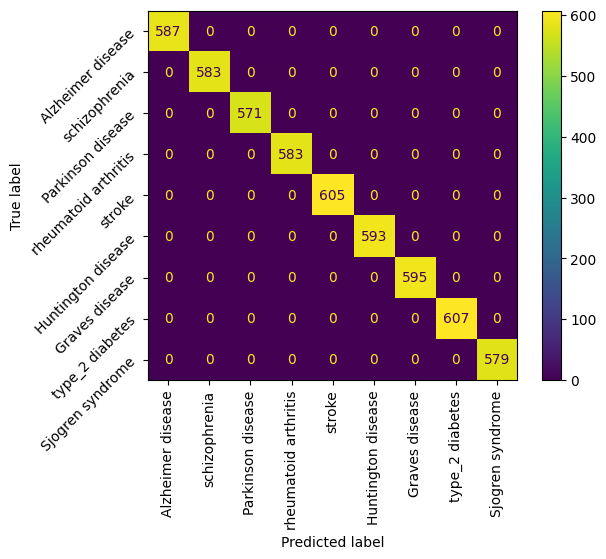

In [138]:
Viz_confusion_Matrix(Model_LGB_ADASYN, Data_train_class_resample,Label_train_class_resample)    #可视化lightGM模型混淆矩阵(训练)

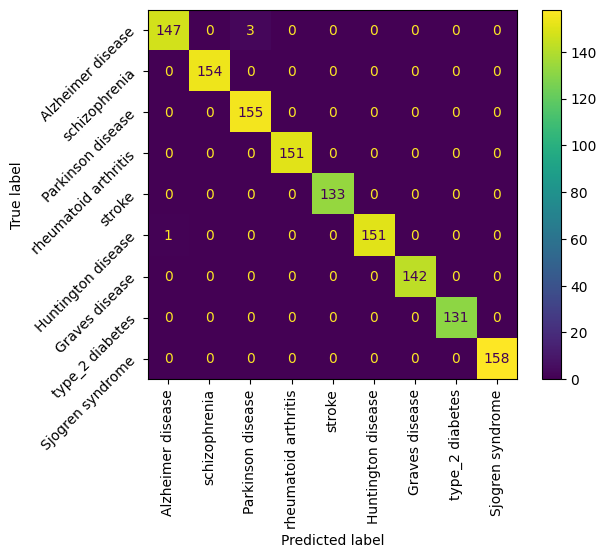

In [139]:
Viz_confusion_Matrix(Model_LGB_ADASYN, Data_test_class_resample,Label_test_class_resample)    #可视化lightGM模型混淆矩阵(测试)

<Axes: title={'center': 'Feature importance'}, xlabel='gain', ylabel='Features'>

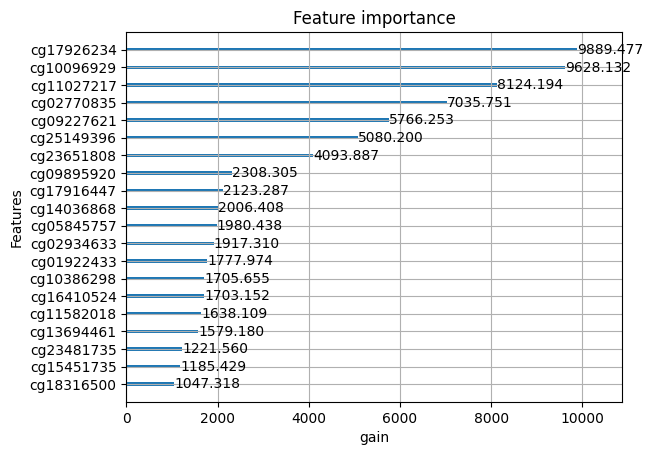

In [140]:
plot_importance(Model_LGB_ADASYN,max_num_features=20,importance_type='gain',xlabel='gain')

In [141]:
#保存模型
joblib.dump(Model_LGB_Class,'/mnt/workspace/Disease_class/ClassModels_Nomal/Model_LGB_Class.pkl')
joblib.dump(Model_LGB_ADASYN,'/mnt/workspace/Disease_class/ClassModels_Nomal/Model_LGB_ADASYN.pkl')

['/mnt/workspace/Disease_class/ClassModels_Nomal/Model_LGB_ADASYN.pkl']

训练CatBoost模型

In [ ]:
#训练catBoost模型
from catboost import CatBoostClassifier
Model_Cat=CatBoostClassifier(learning_rate=0.5, depth=3, bootstrap_type='Bernoulli',
                            random_seed=2023,od_type='Iter', od_wait=100)
Model_Cat.fit(Data_train_class,Label_train_class)

In [143]:
Model_Evaluate(Model_Cat, Data_train_class,Label_train_class, Data_test_class,Label_test_class)

模型训练误差为:0.0,测试误差为:0.06598984771573602
模型训练准确率为:1.0,召回率为:1.0,f1分数为:1.0,精度为:1.0
模型测试准确率为:0.934010152284264,召回率为:0.934010152284264,f1分数为:0.934010152284264,精度为:0.934010152284264
模型训练误差:0.0,测试误差:0.06598984771573602
---------------------训练数据集报告---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       589
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00       103
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       128
           5       1.00      1.00      1.00       305
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00       121
           8       1.00      1.00      1.00        39

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

---------------------测试数据集报告-------

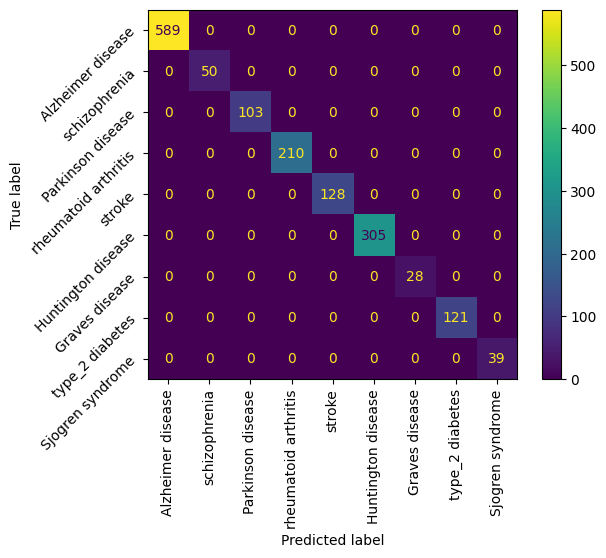

In [144]:
Viz_confusion_Matrix(Model_Cat, Data_train_class,Label_train_class)    #可视化CatBoost模型混淆矩阵(训练)

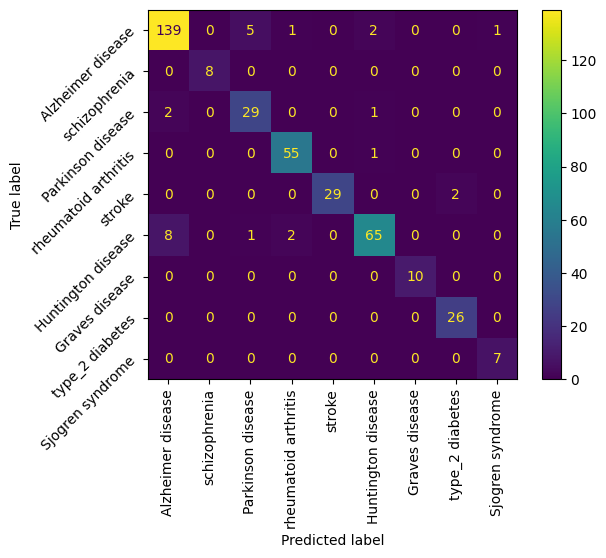

In [145]:
Viz_confusion_Matrix(Model_Cat, Data_test_class,Label_test_class)    #可视化CatBoost模型混淆矩阵(测试)

In [146]:
#绘制CatBoost模型特征重要性评分
Feature_importance_Cat=DataFrame()
Feature_importance_Cat['fearure names']=Data_train_class.columns    #特征列表
Feature_importance_Cat['fearure importance']=Model_Cat.get_feature_importance()    #特征重要性评分
Feature_importance_Cat=Feature_importance_Cat.sort_values('fearure importance',ascending=False)    #按照降序排序

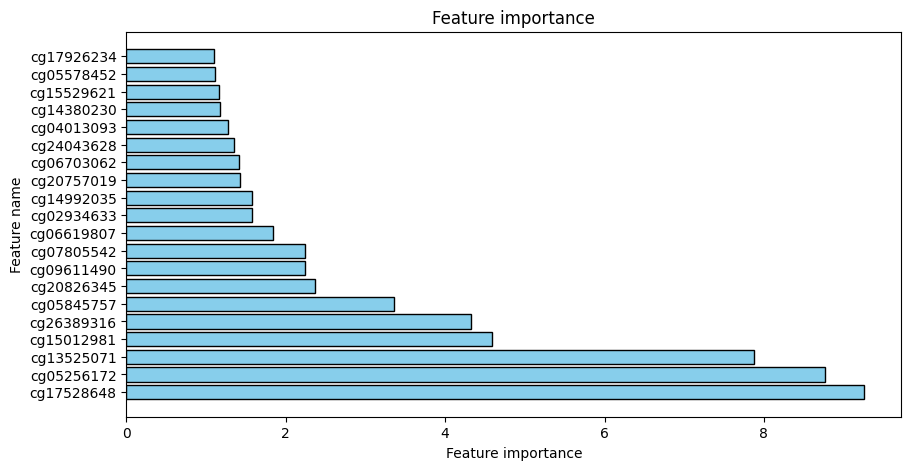

In [147]:
# 绘制CatBoost模型特征重要性柱形图
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('Feature importance')
plt.barh(np.arange(1,21), Feature_importance_Cat.iloc[:20,1],color='skyblue', edgecolor='black')
plt.ylabel('Feature name')  
plt.xlabel('Feature importance')
plt.yticks(np.arange(1,21),Feature_importance_Cat.iloc[:20,0])
plt.show()

In [ ]:
#使用ADASYN技术处理后
Model_Cat_ADASYN=CatBoostClassifier(learning_rate=0.5, depth=3, bootstrap_type='Bernoulli',
                            random_seed=2023,od_type='Iter', od_wait=100)
Model_Cat_ADASYN.fit(Data_train_class_resample,Label_train_class_resample)

In [150]:
Model_Evaluate(Model_Cat_ADASYN, Data_train_class_resample,Label_train_class_resample, Data_test_class_resample,Label_test_class_resample)    #模型评估

模型训练误差为:0.0,测试误差为:0.006787330316742057
模型训练准确率为:1.0,召回率为:1.0,f1分数为:1.0,精度为:1.0
模型测试准确率为:0.9932126696832579,召回率为:0.9932126696832579,f1分数为:0.9932126696832579,精度为:0.9932126696832579
模型训练误差:0.0,测试误差:0.006787330316742057
---------------------训练数据集报告---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       587
           1       1.00      1.00      1.00       583
           2       1.00      1.00      1.00       571
           3       1.00      1.00      1.00       583
           4       1.00      1.00      1.00       605
           5       1.00      1.00      1.00       593
           6       1.00      1.00      1.00       595
           7       1.00      1.00      1.00       607
           8       1.00      1.00      1.00       579

    accuracy                           1.00      5303
   macro avg       1.00      1.00      1.00      5303
weighted avg       1.00      1.00      1.00      5303

---------------------测试数据集报告-

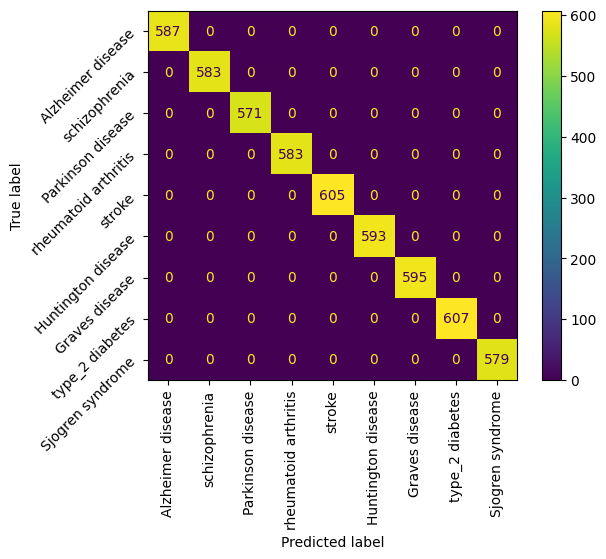

In [151]:
Viz_confusion_Matrix(Model_Cat_ADASYN, Data_train_class_resample,Label_train_class_resample)    #可视化CatBoost模型混淆矩阵(训练)

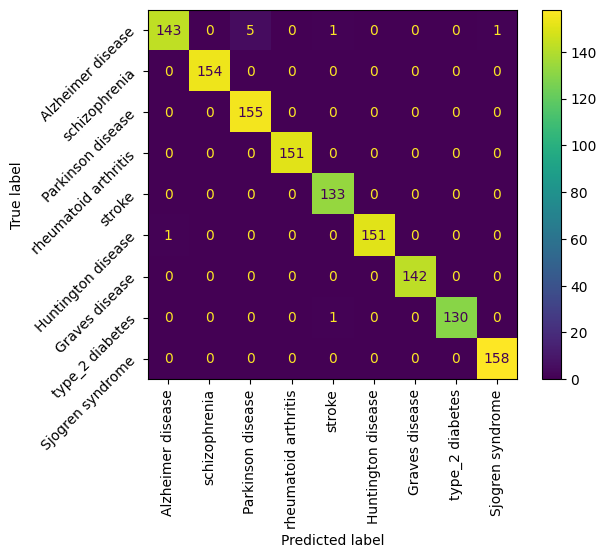

In [152]:
Viz_confusion_Matrix(Model_Cat_ADASYN, Data_test_class_resample,Label_test_class_resample)    #可视化CatBoost模型混淆矩阵(测试)

In [153]:
#绘制CatBoost模型特征重要性评分
Feature_importance_Cat_ADASYN=DataFrame()
Feature_importance_Cat_ADASYN['fearure names']=Data_train_class_resample.columns    #特征列表
Feature_importance_Cat_ADASYN['fearure importance']=Model_Cat_ADASYN.get_feature_importance()    #特征重要性评分
Feature_importance_Cat_ADASYN=Feature_importance_Cat_ADASYN.sort_values('fearure importance',ascending=False)    #按照降序排序

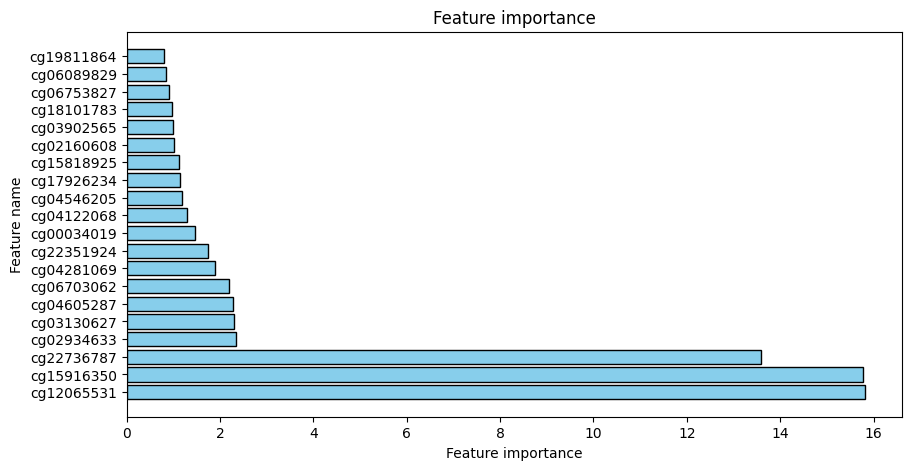

In [154]:
# 绘制CatBoost模型特征重要性柱形图
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('Feature importance')
plt.barh(np.arange(1,21), Feature_importance_Cat_ADASYN.iloc[:20,1],color='skyblue', edgecolor='black')
plt.ylabel('Feature name')  
plt.xlabel('Feature importance')
plt.yticks(np.arange(1,21),Feature_importance_Cat_ADASYN.iloc[:20,0])
plt.show()

In [169]:
#保存模型
joblib.dump(Model_Cat,'/mnt/workspace/Disease_class/ClassModels_Nomal/Model_Cat_Class.pkl')
joblib.dump(Model_Cat_ADASYN,'/mnt/workspace/Disease_class/ClassModels_Nomal/Model_Cat_ADASYN.pkl')

['/mnt/workspace/Disease_class/ClassModels_Nomal/Model_Cat_ADASYN.pkl']

载入SHAP解释器

In [155]:
from pandas import DataFrame
Feature_importance=DataFrame()
Feature_importance['fearure names']=Data_train_class.columns    #特征列表
Feature_importance['fearure importance']=Model_XGB_Class.feature_importances_    #特征重要性评分
Feature_importance=Feature_importance.sort_values('fearure importance',ascending=False)    #按照降序排序

In [156]:
Feature_list=list(Feature_importance.iloc[:20,0])
Feature_Data=DataClass_Nomal.loc[:,Feature_list]
Feature_traindata,Feature_testdata,Feature_trainlabel,Feature_testlabel=train_test_split(Feature_Data,Disease,train_size=0.8,random_state=123)
print('训练集数据规模为:{0},测试集数据规模为:{1}'.format(Feature_traindata.shape,Feature_testdata.shape))
print('训练集标签规模为:{0},测试集标签规模为:{1}'.format(Feature_trainlabel.shape,Feature_testlabel.shape)) 

训练集数据规模为:(1573, 20),测试集数据规模为:(394, 20)
训练集标签规模为:(1573,),测试集标签规模为:(394,)


In [157]:
#训练XGBoost模型
Feature_XGB=xgboost.XGBClassifier(booster='gbtree',n_estimators=800,max_depth=2,objective='multi-softmax',gpu_id=0, tree_method='gpu_hist')
Feature_XGB.fit(Feature_traindata,Feature_trainlabel)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [158]:
Model_Evaluate(Feature_XGB,Feature_traindata,Feature_trainlabel,Feature_testdata,Feature_testlabel)

模型训练误差为:0.0,测试误差为:0.07614213197969544
模型训练准确率为:1.0,召回率为:1.0,f1分数为:1.0,精度为:1.0
模型测试准确率为:0.9238578680203046,召回率为:0.9238578680203046,f1分数为:0.9238578680203046,精度为:0.9238578680203046
模型训练误差:0.0,测试误差:0.07614213197969544
---------------------训练数据集报告---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       589
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00       103
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       128
           5       1.00      1.00      1.00       305
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00       121
           8       1.00      1.00      1.00        39

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

---------------------测试数据集报告---

In [159]:
import shap
Explainer=shap.TreeExplainer(Feature_XGB)    #创建解释器
shap_values=Explainer.shap_values(Feature_traindata)    #计算训练shap值

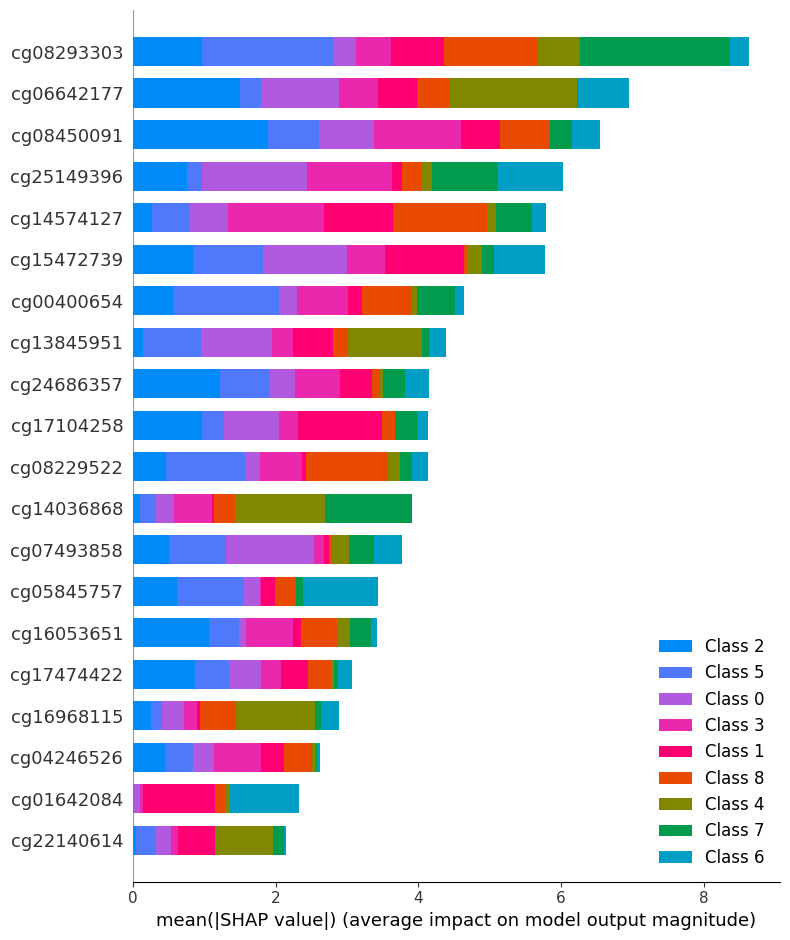

In [160]:
shap.summary_plot(shap_values,Feature_traindata)    #全局特征SHAP分布(训练)

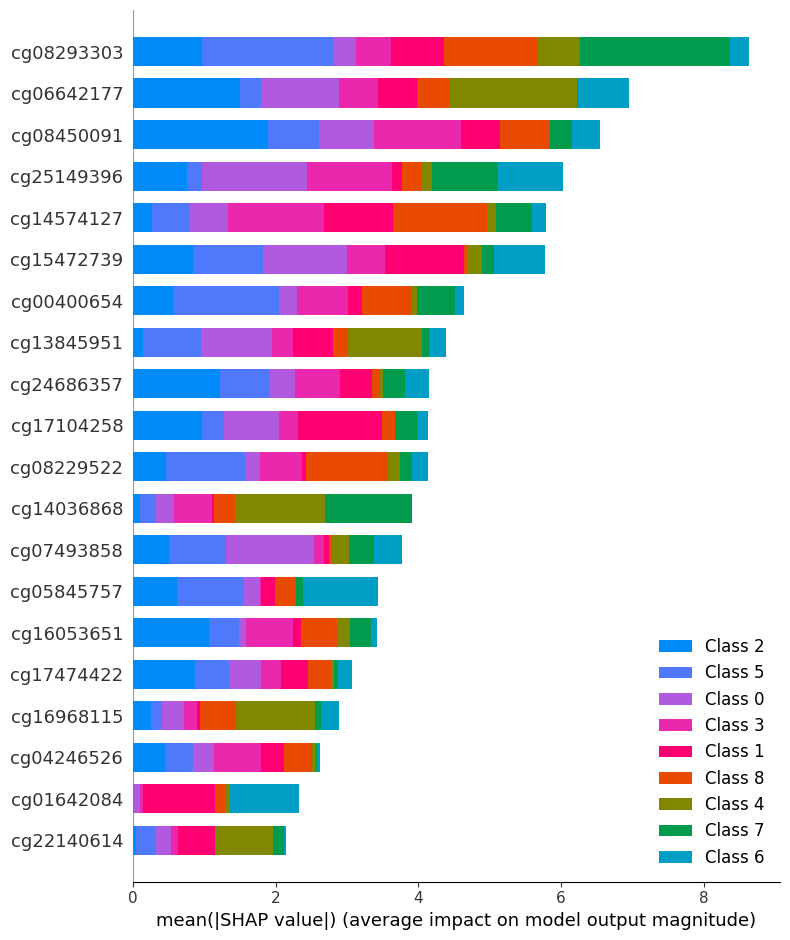

In [161]:
shap.summary_plot(shap_values,Feature_traindata,plot_type='bar')    #特征重要性堆叠图(训练)

In [162]:
Explainer_test=shap.TreeExplainer(Feature_XGB)    #创建解释器
shap_values_test=Explainer_test.shap_values(Feature_testdata)    #计算测试shap值

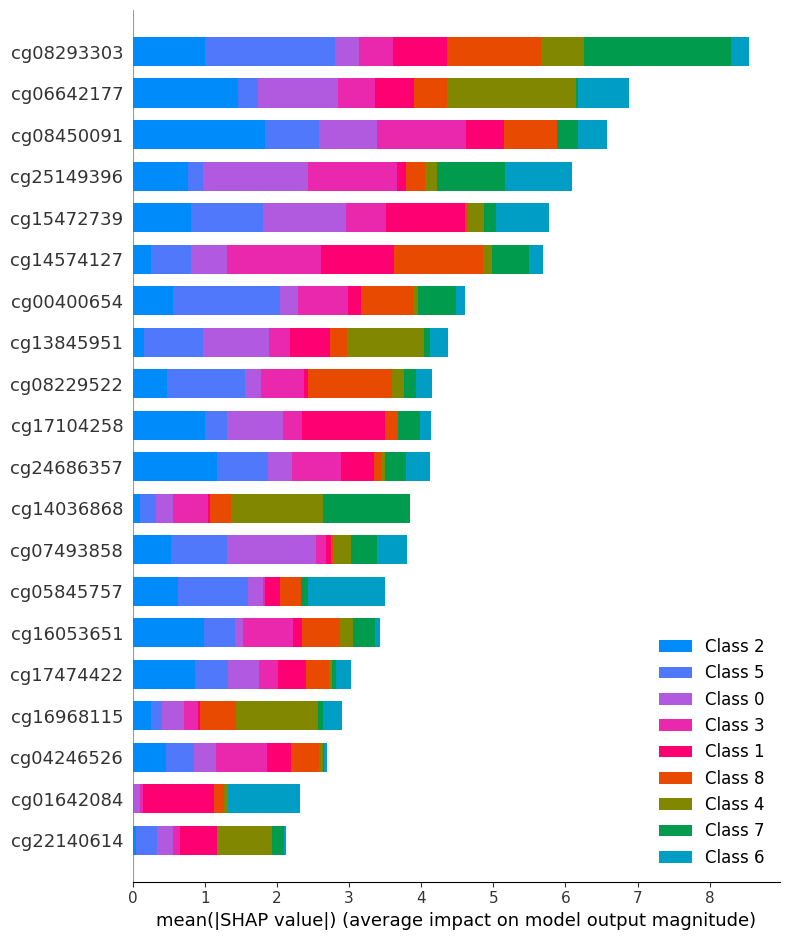

In [163]:
shap.summary_plot(shap_values_test,Feature_testdata)    #全局特征SHAP分布(测试)

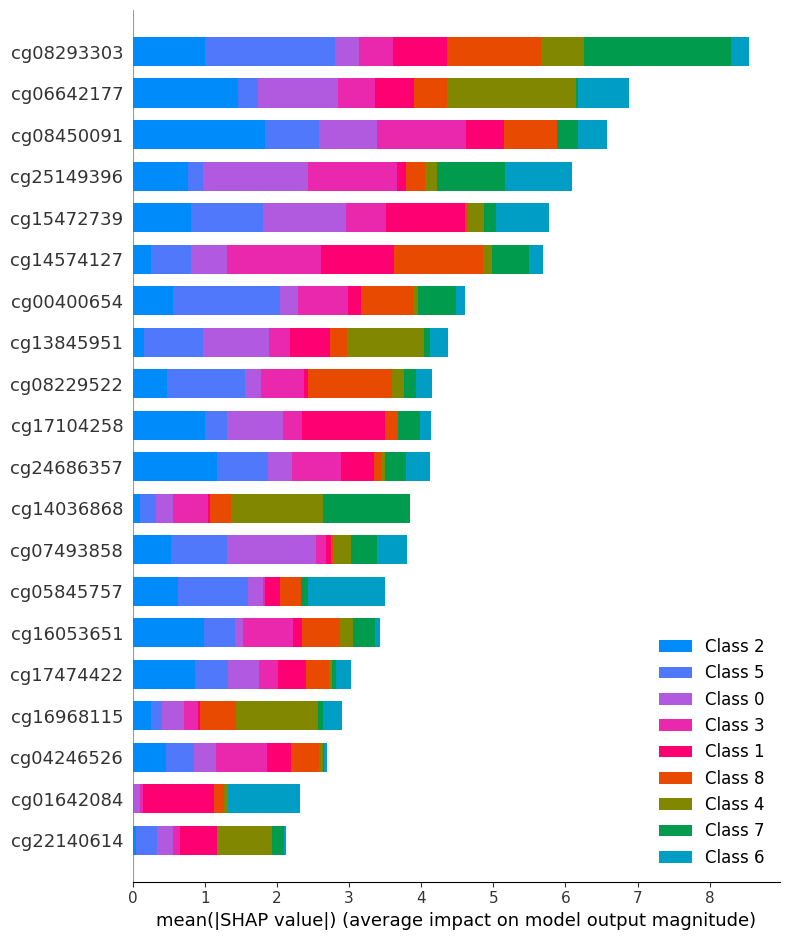

In [164]:
shap.summary_plot(shap_values_test,Feature_testdata,plot_type='bar')    #特征重要性堆叠图(测试)

#载入并评估ADASYN处理后的数据

In [165]:
from pandas import DataFrame
Feature_importance_ADA=DataFrame()
Feature_importance_ADA['fearure names']=Data_train_class_resample.columns    #特征列表
Feature_importance_ADA['fearure importance']=Model_XGB_ADASYN.feature_importances_    #特征重要性评分
Feature_importance_ADA=Feature_importance_ADA.sort_values('fearure importance',ascending=False)    #按照降序排序

In [167]:
Feature_list_ADA=list(Feature_importance_ADA.iloc[:20,0])
Feature_Data_ADA=DataClass_Nomal_Resmapled.loc[:,Feature_list]
Feature_traindata_resample,Feature_testdata_resample,Feature_trainlabel_resample,Feature_testlabel_resample=train_test_split(
    Feature_Data_ADA,Disease_Resampled,train_size=0.8,random_state=123)
print('训练集数据规模为:{0},测试集数据规模为:{1}'.format(Feature_traindata_resample.shape,Feature_testdata_resample.shape))
print('训练集标签规模为:{0},测试集标签规模为:{1}'.format(Feature_trainlabel_resample.shape,Feature_testlabel_resample.shape)) 

训练集数据规模为:(5303, 20),测试集数据规模为:(1326, 20)
训练集标签规模为:(5303,),测试集标签规模为:(1326,)


In [168]:
#训练XGBoost模型
Feature_XGB_ADA=xgboost.XGBClassifier(booster='gbtree',n_estimators=800,max_depth=2,objective='multi-softmax',gpu_id=0, tree_method='gpu_hist')
Feature_XGB_ADA.fit(Feature_traindata_resample,Feature_trainlabel_resample)
Model_Evaluate(Feature_XGB_ADA,Feature_traindata_resample,Feature_trainlabel_resample,Feature_testdata_resample,Feature_testlabel_resample)

模型训练误差为:0.0,测试误差为:0.016591251885369585
模型训练准确率为:1.0,召回率为:1.0,f1分数为:1.0,精度为:1.0
模型测试准确率为:0.9834087481146304,召回率为:0.9834087481146304,f1分数为:0.9834087481146304,精度为:0.9834087481146304
模型训练误差:0.0,测试误差:0.016591251885369585
---------------------训练数据集报告---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       587
           1       1.00      1.00      1.00       583
           2       1.00      1.00      1.00       571
           3       1.00      1.00      1.00       583
           4       1.00      1.00      1.00       605
           5       1.00      1.00      1.00       593
           6       1.00      1.00      1.00       595
           7       1.00      1.00      1.00       607
           8       1.00      1.00      1.00       579

    accuracy                           1.00      5303
   macro avg       1.00      1.00      1.00      5303
weighted avg       1.00      1.00      1.00      5303

---------------------测试数据集报告-

In [170]:
Explainer_ADA=shap.TreeExplainer(Feature_XGB_ADA)    #创建解释器
shap_values_ADA=Explainer_ADA.shap_values(Feature_traindata_resample)    #计算训练shap值

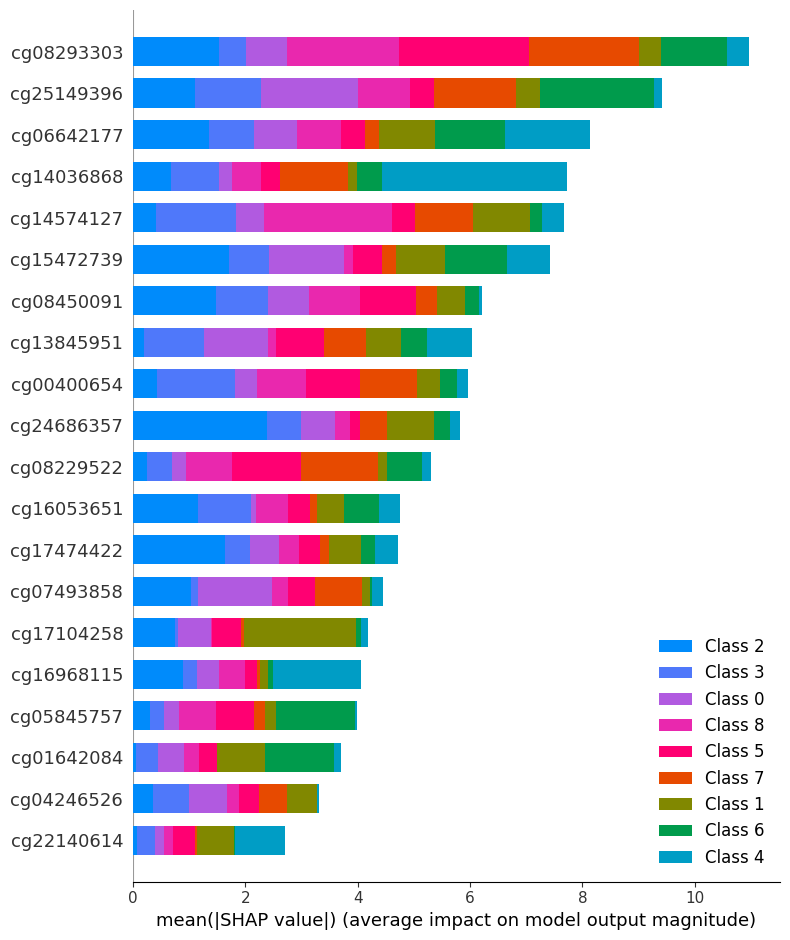

In [171]:
shap.summary_plot(shap_values_ADA,Feature_traindata_resample)    #全局特征SHAP分布(训练)

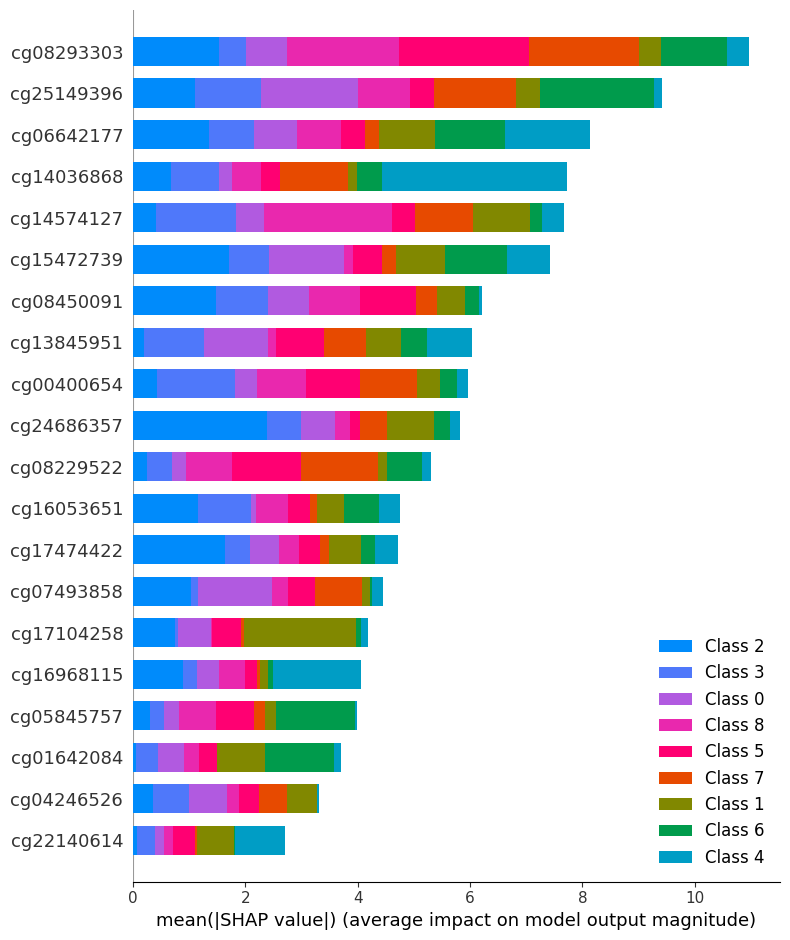

In [172]:
shap.summary_plot(shap_values_ADA,Feature_traindata_resample,plot_type='bar')    #特征重要性堆叠图(训练)

In [174]:
Explainer_test_ADA=shap.TreeExplainer(Feature_XGB_ADA)    #创建解释器
shap_values_test_ADA=Explainer_test.shap_values(Feature_testdata_resample)    #计算测试shap值

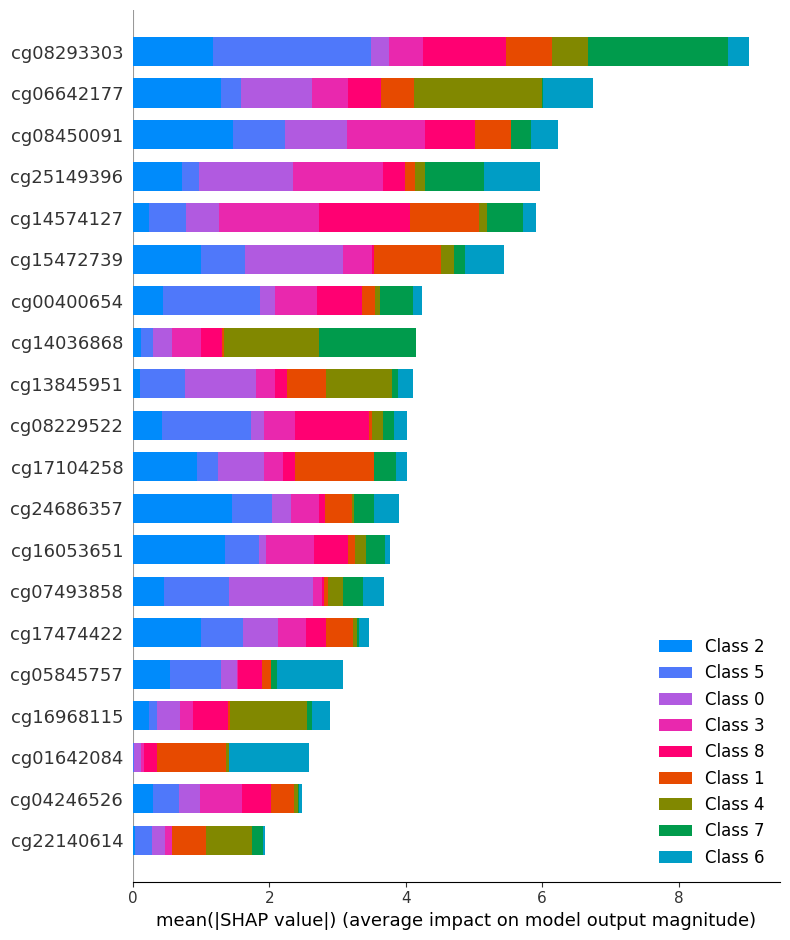

In [175]:
shap.summary_plot(shap_values_test_ADA,Feature_testdata_resample)    #全局特征SHAP分布(测试)

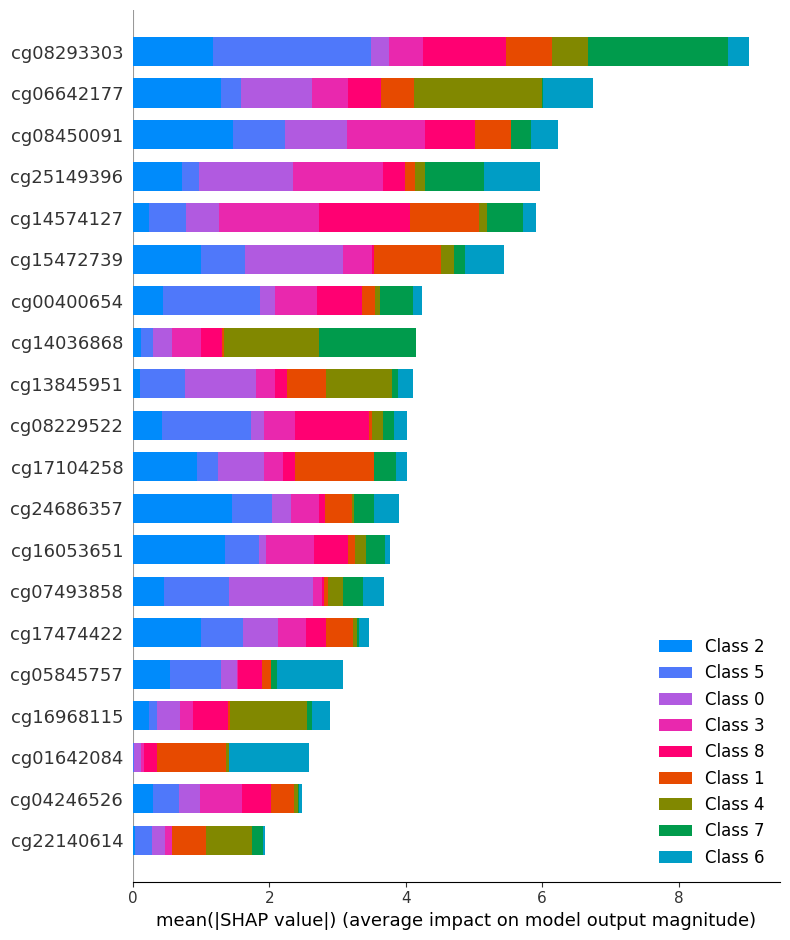

In [176]:
shap.summary_plot(shap_values_test_ADA,Feature_testdata_resample,plot_type='bar')    #特征重要性堆叠图(测试)

In [180]:
traindata

sample_id  cg00050873  cg00212031  cg00213748  cg00214611  cg00455876   
0     train10001    0.000000    0.000000         0.0    0.000000    0.000000  \
1     train10002    0.000000    0.000000         0.0    0.000000    0.000000   
2     train10003    0.000000    0.000000         0.0    0.000000    0.000000   
3     train10004    0.000000    0.000000         0.0    0.000000    0.000000   
4     train10005    1.136022   -4.489850         0.0   -3.993781    1.312567   
...          ...         ...         ...         ...         ...         ...   
8228  train18229    1.991711   -3.886935         0.0   -3.256540    0.851873   
8229  train18230    2.020410   -3.938986         0.0   -3.543689    1.259524   
8230  train18231    1.814692   -3.343970         0.0   -3.580953    0.000000   
8231  train18232    1.550147   -2.963760         0.0   -3.744756    1.443126   
8232  train18233    2.142023   -2.881228         0.0   -3.701353    0.000000   

      cg01707559  cg02004872  cg02011394  cg02050847  ...  cg19349217   
0       0.000000    0.000000    0.000000    0.000000  ...   -3.201956  \
1       0.000000    0.000000    0.000000    0.000000  ...   -3.659672   
2       0.000000    0.000000    0.000000    0.000000  ...   -2.454856   
3      -1.398461    0.000000    0.000000    0.000000  ...   -2.942546   
4      -2.901295   -4.585271    2.804368    2.985388  ...   -4.247583   
...          ...         ...         ...         ...  ...         ...   
8228   -2.664729   -4.051632    2.842141    4.585271  ...   -2.732410   
8229   -2.388119   -4.112908    3.472874    3.701353  ...   -2.664729   
8230   -2.570129   -4.585271    3.343970    4.585271  ...   -4.247583   
8231   -0.904911   -4.585271    3.374769    3.837361  ...   -3.543689   
8232   -2.110522   -4.051632    3.406479    4.807960  ...   -3.886935   

      cg19349369  cg19350197   age  gender     sample_type   
0      -1.185564    2.253116  88.0       F  disease tissue  \
1      -1.765757    2.511081  92.0       F  disease tissue   
2      -1.213659    1.765757  93.0       F  disease tissue   
3      -1.856830    2.207487  96.0       F  disease tissue   
4      -1.749816    2.264792  91.0       M  disease tissue   
...          ...         ...   ...     ...             ...   
8228   -4.402578    0.929415  74.0       M  disease tissue   
8229   -3.507691    0.708031  74.0       M  disease tissue   
8230   -3.993781    0.627708  81.0       M  disease tissue   
8231   -4.247583    0.818704  67.0       M  disease tissue   
8232   -4.178048    0.880658  68.0       M  disease tissue   

                  disease  disease_encode  sample_type_encode  gender_encode  
0     Alzheimer's disease               1                   1            0.0  
1     Alzheimer's disease               1                   1            0.0  
2     Alzheimer's disease               1                   1            0.0  
3     Alzheimer's disease               1                   1            0.0  
4     Alzheimer's disease               1                   1            1.0  
...                   ...             ...                 ...            ...  
8228      type 2 diabetes               9                   1            1.0  
8229      type 2 diabetes               9                   1            1.0  
8230      type 2 diabetes               9                   1            1.0  
8231      type 2 diabetes               9                   1            1.0  
8232      type 2 diabetes               9                   1            1.0  

[8233 rows x 50008 columns]

In [185]:
#数据集整理
Dataclass_list=Feature_list+['age','gender','sample_type','disease','disease_encode','sample_type_encode','gender_encode']
ClassData=DataClass.loc[:,Dataclass_list]
Dataclass_list_ADA=Feature_list_ADA+['age','gender','sample_type','disease','disease_encode','sample_type_encode','gender_encode']
ClassData_ADA=DataClass.loc[:,Dataclass_list_ADA]

In [186]:
ClassData.to_excel('/mnt/workspace/Disease_class/Feature_Data_ClassDisease/ClassDisease_FeatureData_Nomal.xlsx','UTF-8')
ClassData_ADA.to_excel('/mnt/workspace/Disease_class/Feature_Data_ClassDisease/ClassDisease_FeatureData_Nomal_ADA.xlsx','UTF-8')

比较不同解决方案甲基化数据差异

In [190]:
#比较是否执行ADASYN算法的基因差异
CG_dict=set(Feature_list)
CG_dict_ADA=set(Feature_list_ADA)
diff_ada=CG_dict.symmetric_difference(CG_dict_ADA)     #获取不同元素
same_ada=CG_dict.intersection(CG_dict_ADA)    #获取相同元素
print('相同甲基化位点:',same_ada)
print('不同甲基化位点:',diff_ada)

相同甲基化位点: {'cg05845757', 'cg16053651'}
不同甲基化位点: {'cg08293303', 'cg03130627', 'cg01642084', 'cg11917413', 'cg25149396', 'cg16378352', 'cg17474422', 'cg23651808', 'cg04871364', 'cg14574127', 'cg13845951', 'cg00400654', 'cg24686357', 'cg02770835', 'cg10744200', 'cg15472739', 'cg04246526', 'cg01922433', 'cg17104258', 'cg22140614', 'cg09227621', 'cg04562683', 'cg09681335', 'cg10096929', 'cg16968115', 'cg11447335', 'cg11027217', 'cg17916447', 'cg14036868', 'cg06642177', 'cg08450091', 'cg08229522', 'cg06857865', 'cg24828811', 'cg17926234', 'cg07493858'}


In [187]:
DataClass=pd.read_excel('/mnt/workspace/Disease_class/Feature_Data_ClassDisease/ClassDisease_FeatureData.xlsx')

In [188]:
Feature_list_Mal=DataClass.columns[1:-6]
Feature_list_Mal

Index(['cg10501210', 'cg25149396', 'cg10818901', 'cg00687252', 'cg05839741',
       'cg00339300', 'cg18813010', 'cg13299325', 'cg21573263', 'cg00400654',
       'cg04571355', 'cg10057528', 'cg17983632', 'cg10378348', 'cg16037711',
       'cg13845951', 'cg08146977', 'cg08229522', 'cg13675050', 'cg12467852'],
      dtype='object')

In [189]:
#比较不同方法甲基化位点数据
Feature_Nomal=set(Feature_list)
Feature_mal=set(list(Feature_list_Mal))
diff=Feature_Nomal.symmetric_difference(Feature_mal)     #获取不同元素
same=Feature_Nomal.intersection(Feature_mal)    #获取相同元素
print('相同甲基化位点:',same)
print('不同甲基化位点:',diff)

相同甲基化位点: {'cg13845951', 'cg00400654', 'cg25149396', 'cg08229522'}
不同甲基化位点: {'cg04571355', 'cg15472739', 'cg07493858', 'cg12467852', 'cg13675050', 'cg10378348', 'cg10057528', 'cg08293303', 'cg17474422', 'cg16053651', 'cg14036868', 'cg04246526', 'cg01642084', 'cg06642177', 'cg17983632', 'cg08450091', 'cg14574127', 'cg10501210', 'cg21573263', 'cg17104258', 'cg24686357', 'cg05839741', 'cg22140614', 'cg13299325', 'cg18813010', 'cg16037711', 'cg00339300', 'cg08146977', 'cg16968115', 'cg10818901', 'cg05845757', 'cg00687252'}
